# Test analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
import pandas as pd
import dask
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
# from dask.distributed import Client
%matplotlib inline

In [2]:
from functions import ccplot, binning

In [3]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="ticks")

In [4]:
# Colormap selection
xr.set_options(cmap_divergent='RdBu_r', cmap_sequential='YlGnBu')

In [5]:
mfdata_DIR = './data/test/gpm*.nc'

gpm = xr.open_mfdataset(mfdata_DIR, chunks={'time':2000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_dataset('./data/GPM_data/gpm_2000.nc', chunks={"time":2000})

In [6]:
gpm.unify_chunks()
gpm.chunks

Frozen({'time': (2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1520), 'lat': (161,), 'lon': (161,)})

In [7]:
gpm

<xarray.Dataset>
Dimensions:    (time: 52560, lon: 161, lat: 161)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 ... 2019-12-31T23:30:00
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>

In [8]:
precip = gpm.precipCal.resample(time = '1H').mean()

In [9]:
precip = precip.chunk(dict(time=2000))

In [10]:
precip.unify_chunks()
precip.chunks

((2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  2000,
  280),
 (161,),
 (161,))

In [11]:
precip

<xarray.DataArray 'precipCal' (time: 26280, lat: 161, lon: 161)>
dask.array<rechunk-merge, shape=(26280, 161, 161), dtype=float32, chunksize=(2000, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 ... 2019-12-31T23:00:00
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0

In [12]:
mfdata_DIR2 = './data/test/era*.nc'

era = xr.open_mfdataset(mfdata_DIR2, chunks={'time':2000}, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)

In [13]:
with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    era = era.reindex(latitude = era.latitude[::-1])

In [14]:
era = era.unify_chunks()
era.chunks

Frozen({'time': (2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760, 2000, 2000, 2000, 2000, 760), 'latitude': (161,), 'longitude': (161,)})

In [15]:
era

<xarray.Dataset>
Dimensions:    (latitude: 161, longitude: 161, time: 26280)
Coordinates:
  * latitude   (latitude) float32 0.0 0.25 0.5 0.75 ... 39.25 39.5 39.75 40.0
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * time       (time) datetime64[ns] 2017-01-01 ... 2019-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-11 09:03:14 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [16]:
# era.coords['latitude'] = np.flip(era.coords['latitude'])

In [17]:
era = era.transpose('time', 'latitude', 'longitude')

In [18]:
era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})

In [19]:
era = era.rename({'longitude':'lon', 'latitude':'lat'})

In [20]:
era

<xarray.Dataset>
Dimensions:  (lat: 161, lon: 161, time: 26280)
Coordinates:
  * lat      (lat) float32 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2017-01-01 ... 2019-12-31T23:00:00
Data variables:
    u10      (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    v10      (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    d2m      (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    t2m      (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    mx2t     (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    mn2t     (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(2000, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-11 09:03:14 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [21]:
t2m = era.t2m
d2m = era.d2m

In [22]:
t2m = t2m.chunk(dict(time=2000))
d2m = d2m.chunk(dict(time=2000))

In [23]:
ds_comb = xr.merge([precip, t2m, d2m])

In [26]:
ds_comb.to_netcdf('./data/combined/ds_comb.nc')

/home/nkv/.miniconda/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [27]:
del gpm
del era
del t2m
del precip
del d2m
del ds_comb

## Binning

In [28]:
ds_comb = xr.open_dataset('./data/combined/ds_comb.nc')

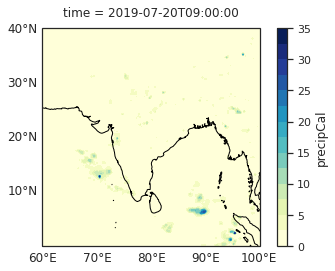

In [29]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([59.9, 100.1, -0.1, 40.1], crs=ccrs.PlateCarree())
ds_comb.precipCal.sel(time="2019-07-20 09:00:00").plot.contourf(ax = ax, extend='neither', levels=15)
ax.coastlines()
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--')
gridliner.top_labels = False
gridliner.right_labels = False
gridliner.ylines = False  # you need False
gridliner.xlines = False  # you need False

In [30]:
precip = ds_comb.precipCal
t2m = ds_comb.t2m
d2m = ds_comb.d2m

In [31]:
precip_daily_rate = precip[::-1].rolling(time=24).sum()[::-1]

In [ ]:
# Set values less than 1 mm/hr to nan

precip = xr.where(precip_daily_rate < 1, np.nan, precip)
t2m = t2m.where(precip != np.nan)
d2m = d2m.where(precip != np.nan)

In [ ]:
ds_comb_new = xr.merge([precip, t2m, d2m]).chunk(dict(time=-1, lat=40, lon=40))
ds_comb_new

In [32]:
ds_comb_new.unify_chunks()
ds_comb_new.chunks

Frozen({'time': (26280,), 'lat': (40, 40, 40, 40, 1), 'lon': (40, 40, 40, 40, 1)})

In [33]:
mum = ds_comb_new.sel(lat = 19.5, lon = 72.5)

In [35]:
mum.chunks

Frozen({'time': (26280,)})

In [36]:
binned_ds99 = binning.get_binned(mum.isel(time=slice(0,2000)), percentile_val=0.99, var = "t2m")

/home/nkv/.miniconda/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
binned_ds50 = binning.get_binned(mum, percentile_val=0.50, var = "t2m")

In [95]:
binned_ds50

<xarray.Dataset>
Dimensions:    (t2m_bins: 24)
Coordinates:
  * t2m_bins   (t2m_bins) object (292.726, 296.352] ... (302.604, 304.429]
    quantile   float64 0.5
Data variables:
    precipCal  (t2m_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    t2m        (t2m_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    d2m        (t2m_bins) float64 dask.array<chunksize=(1,), meta=np.ndarray>

In [96]:
temparr99, preciparr1_99, preciparr2_99 = ccplot.get_ideal_data(mum.t2m, 1, 10)
temparr50, preciparr1_50, preciparr2_50 = ccplot.get_ideal_data(mum.t2m, 1, 10)

In [100]:
binned_ds99 = binned_ds99.rename_vars({'precipCal':'precipitationCal'})
binned_ds50 = binned_ds50.rename_vars({'precipCal':'precipitationCal'})

/home/nkv/.miniconda/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/nkv/.miniconda/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/nkv/.miniconda/lib/python3.9/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


KeyboardInterrupt: 

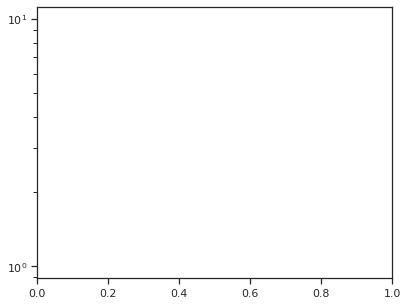

In [101]:
fig = plt.figure(figsize=(14,5))

plt.subplot(121)
ccplot.plot(mum.chunk(dict(time=-1)), binned_ds99, "t2m_bins", temparr99, preciparr1_99, preciparr2_99, fit=False, color = 'blue')
plt.ylabel('Precipitation (mm/hr)')
plt.xlabel('Temperature (K)')
plt.title('99th percentile')

fig.gca().yaxis.set_ticks_position('both')

plt.subplot(122)
ccplot.plot(mum.chunk(dict(time=-1)), binned_ds50, "t2m_bins", temparr50, preciparr1_50, preciparr2_50, fit=False, color = 'green')

# plt.ylabel('Precipitation (mm/hr)')
plt.xlabel('Temperature (K)')
plt.title('50th percentile')
plt.yticks([0.001, 0.01, 0.1, 1,10,100])

fig.gca().yaxis.set_ticks_position('both')
fig.tight_layout()
plt.savefig('./images/mumbai_ccplot.pdf', dpi = 300)